In [32]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from qsogen_4_catalog.qsosed import Quasar_sed

In [33]:
fname = "qsogen_4_catalog/narrow_lines/NL_templates_OIII/nlr_-1.5_0.008_0.3_3.0_-1.7_800.0.dat"

In [34]:
lines = pd.read_csv(fname, sep = ' ', header = None).to_numpy()





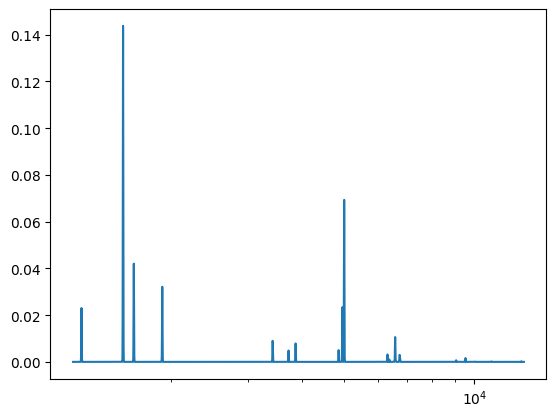

In [41]:
fig, ax = plt.subplots()
#ax.scatter(lines[:,0], lines[:,1], s =1)
ax.plot(lines[:,0], lines[:,1])
#ax.plot(prova[:,0], prova[:,1], marker ='o', c ='r')
#ax.plot(lines[:,0], y, marker ='o', c ='r', markersize =1)

ax.set_xscale('log')
#ax.set_xlim(4900, 5100)

In [23]:
xmin = 4990
xmax = 5030
logic = (lines[:,0]>=xmin) & (lines[:,0]<=xmax)
np.trapz(lines[logic,1], lines[logic,0])


0.9986192374242039

In [15]:
sed_feltre = Quasar_sed(32, AGN_type=1, ebv = 0,  NL_normalization="feltre")
sed_lamastra = Quasar_sed(32, AGN_type=1, ebv = 0,  NL_normalization="lamastra")

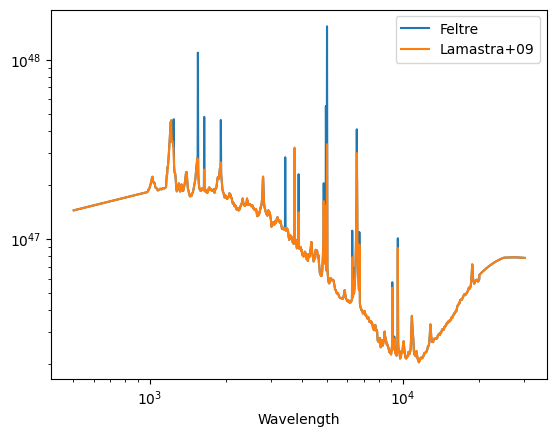

In [16]:
fig, ax = plt.subplots()
ax.loglog(sed_feltre.wavlen, sed_feltre.lum, label = "Feltre")
ax.loglog(sed_lamastra.wavlen, sed_lamastra.lum, label = "Lamastra+09")
ax.set_xlabel("Wavelength")
ax.legend()

/tmp/ipykernel_21726/4165516110.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])
/tmp/ipykernel_21726/4165516110.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])


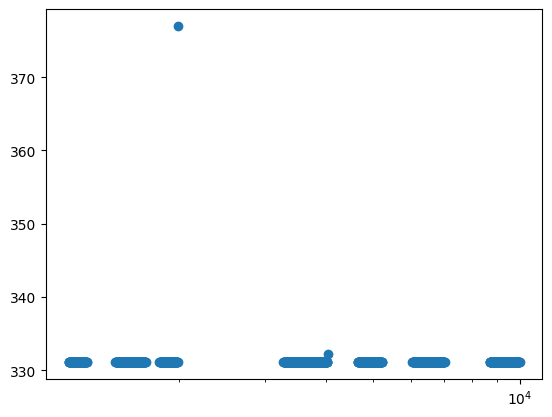

In [21]:
fig, ax = plt.subplots()
ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])
#ax.plot(template_1[:,0], template_1[:,1])

ax.set_xscale('log')

In [34]:
def get_integrated_xray_luminosity(log_L_1, wavlen_1 = 6.2, wavlen_2 = 1.24, gamma = 1.8):
    ###it computes the integrated luminosity between wavlen_1 and wavlen_2
    ###log_L_1 is in erg/s hz^-1
    ### L_lambda ~ lambda^gamma-3
    log_L_1_lambda = log_L_1 - np.log10(wavlen_1*wavlen_1/2.998e18)
    log_norm = log_L_1_lambda - (gamma-3)*np.log10(wavlen_1)
    if wavlen_1 >= wavlen_2:
        temp = np.log10((wavlen_1**(gamma-2)- wavlen_2**(gamma-2))/(gamma-2))
        
    else:
        temp = np.log10((wavlen_2**(gamma-2) - wavlen_1**(gamma-2))/(gamma-2))
    return log_norm +temp

def get_L2kev(L2500):
    ##Lusso+16
    return 0.642*L2500 +6.965


In [39]:
lx = get_L2kev(35)

In [40]:
get_integrated_xray_luminosity(lx)

47.397884465445856